# Data Description:¶

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. The below data is collected from the Indian online shoppers, and includes the important factors that influence the online customers purchase and repeat purchase intentions. 

Customer’s characteristics and demographics play a pivotal role in understanding retention behavior. the dataset contains such important information of the customers with help of which we can analyse the future scope of the business.

# Importing the Dataset:¶

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [203]:
df=pd.read_csv('(1)customer_retention_dataset.csv')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [204]:
df.shape

(269, 71)

There are 269 rows and 71 columns in the dataset

# Checking the Null Values:

In [205]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

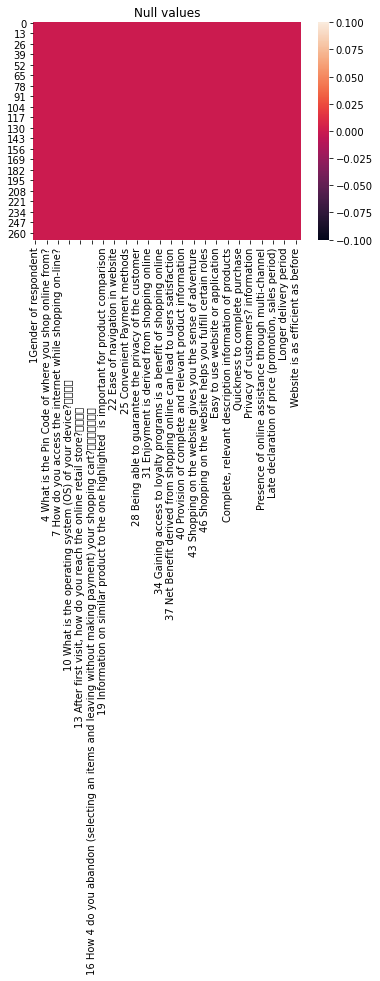

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are no null values in the dataset.

# Checking the datatypes of the columns:

In [207]:
df.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

Since the dataset has columns with object type, we will be using encoding techique to encode it

# Making DataFrame for Visualisation of the Data:

In [208]:
df_visualization=df[['1Gender of respondent', '3 Which city do you shop online from?', '4 What is the Pin Code of where you shop online from?', '5 Since How Long You are Shopping Online ?', '6 How many times you have made an online purchase in the past 1 year?', '7 How do you access the internet while shopping on-line?', '8 Which device do you use to access the online shopping?', '18 The content on the website must be easy to read and understand', '19 Information on similar product to the one highlighted  is important for product comparison', '20 Complete information on listed seller and product being offered is important for purchase decision.', '21 All relevant information on listed products must be stated clearly', '22 Ease of navigation in website', '23 Loading and processing speed', '24 User friendly Interface of the website', '25 Convenient Payment methods', '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', '27 Empathy (readiness to assist with queries) towards the customers', '28 Being able to guarantee the privacy of the customer', '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', '30 Online shopping gives monetary benefit and discounts', '31 Enjoyment is derived from shopping online', '32 Shopping online is convenient and flexible', '33 Return and replacement policy of the e-tailer is important for purchase decision', '34 Gaining access to loyalty programs is a benefit of shopping online', '35 Displaying quality Information on the website improves satisfaction of customers', '36 User derive satisfaction while shopping on a good quality website or application', '37 Net Benefit derived from shopping online can lead to users satisfaction', '38 User satisfaction cannot exist without trust', '39 Offering a wide variety of listed product in several category', '40 Provision of complete and relevant product information', '41 Monetary savings', '42 The Convenience of patronizing the online retailer', '43 Shopping on the website gives you the sense of adventure', '44 Shopping on your preferred e-tailer enhances your social status', '45 You feel gratification shopping on your favorite e-tailer', '46 Shopping on the website helps you fulfill certain roles', '47 Getting value for money spent']].copy()

In [209]:
df_visualization.columns

Index(['1Gender of respondent', '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fu

# Visualization of the Data:

In [210]:
import seaborn as sns

0      0
1      1
2      1
3      0
4      1
      ..
264    1
265    1
266    1
267    1
268    1
Name: 1Gender of respondent, Length: 269, dtype: int64


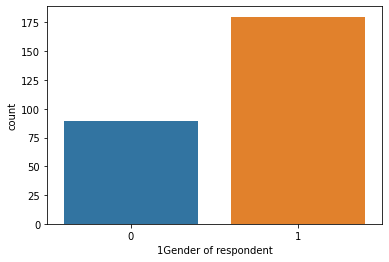

In [211]:
ax = sns.countplot(x="1Gender of respondent", data=df_visualization)
print(df_visualization["1Gender of respondent"])

0              Delhi
1              Delhi
2      Greater Noida
3            Karnal 
4         Bangalore 
           ...      
264            Solan
265        Ghaziabad
266       Bangalore 
267            Solan
268        Ghaziabad
Name: 3 Which city do you shop online from?, Length: 269, dtype: object


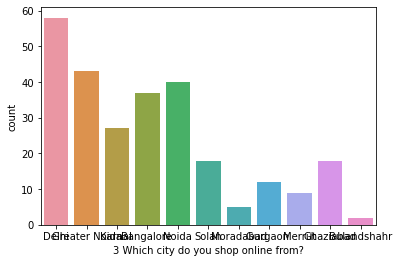

In [212]:
ax = sns.countplot(x="3 Which city do you shop online from?", data=df_visualization)
print(df_visualization["3 Which city do you shop online from?"])

0      5
1      5
2      4
3      4
4      3
      ..
264    2
265    2
266    3
267    3
268    3
Name: 5 Since How Long You are Shopping Online ?, Length: 269, dtype: int64


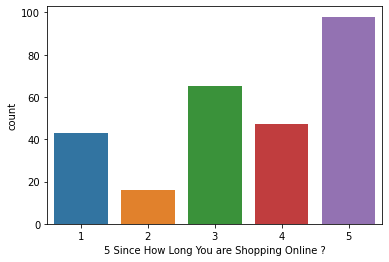

In [213]:
ax = sns.countplot(x="5 Since How Long You are Shopping Online ?", data=df_visualization)
print(df_visualization["5 Since How Long You are Shopping Online ?"])

0      4
1      5
2      5
3      1
4      2
      ..
264    1
265    4
266    1
267    1
268    4
Name: 6 How many times you have made an online purchase in the past 1 year?, Length: 269, dtype: int64


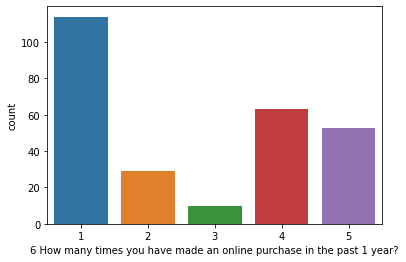

In [214]:
ax = sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?", data=df_visualization)
print(df_visualization["6 How many times you have made an online purchase in the past 1 year?"])

0      4
1      2
2      3
3      3
4      2
      ..
264    3
265    3
266    3
267    2
268    3
Name: 7 How do you access the internet while shopping on-line?, Length: 269, dtype: int64


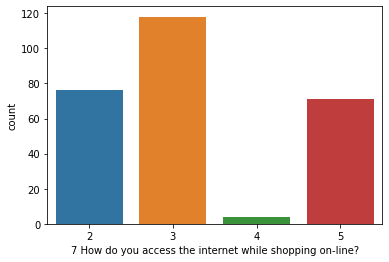

In [215]:
ax = sns.countplot(x="7 How do you access the internet while shopping on-line?", data=df_visualization)
print(df_visualization["7 How do you access the internet while shopping on-line?"])

0      3
1      1
2      1
3      1
4      1
      ..
264    1
265    1
266    2
267    1
268    1
Name: 8 Which device do you use to access the online shopping?, Length: 269, dtype: int64


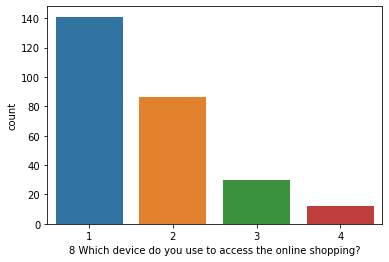

In [216]:
ax = sns.countplot(x="8 Which device do you use to access the online shopping?", data=df_visualization)
print(df_visualization["8 Which device do you use to access the online shopping?"])

0      4
1      5
2      5
3      4
4      5
      ..
264    4
265    5
266    5
267    5
268    5
Name: 18 The content on the website must be easy to read and understand, Length: 269, dtype: int64


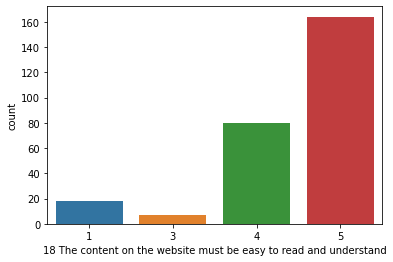

In [217]:
ax = sns.countplot(x="18 The content on the website must be easy to read and understand", data=df_visualization)
print(df_visualization["18 The content on the website must be easy to read and understand"])

0      3
1      5
2      4
3      4
4      3
      ..
264    4
265    5
266    5
267    4
268    5
Name: 19 Information on similar product to the one highlighted  is important for product comparison, Length: 269, dtype: int64


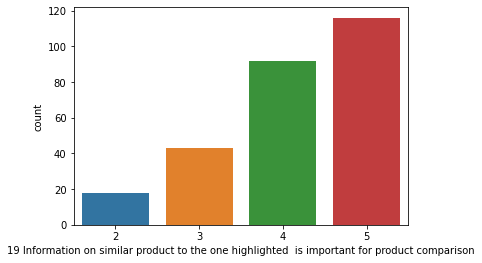

In [218]:
ax = sns.countplot(x="19 Information on similar product to the one highlighted  is important for product comparison", data=df_visualization)
print(df_visualization["19 Information on similar product to the one highlighted  is important for product comparison"])

0      3
1      5
2      4
3      3
4      3
      ..
264    4
265    5
266    4
267    5
268    5
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., Length: 269, dtype: int64


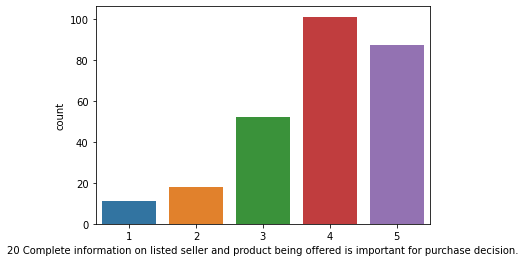

In [219]:
ax = sns.countplot(x="20 Complete information on listed seller and product being offered is important for purchase decision.", data=df_visualization)
print(df_visualization["20 Complete information on listed seller and product being offered is important for purchase decision."])

0      4
1      5
2      4
3      4
4      4
      ..
264    4
265    5
266    4
267    4
268    5
Name: 21 All relevant information on listed products must be stated clearly, Length: 269, dtype: int64


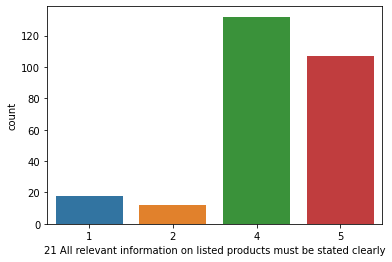

In [220]:
ax = sns.countplot(x="21 All relevant information on listed products must be stated clearly", data=df_visualization)
print(df_visualization["21 All relevant information on listed products must be stated clearly"])

0      4
1      5
2      4
3      5
4      4
      ..
264    4
265    5
266    5
267    4
268    5
Name: 22 Ease of navigation in website, Length: 269, dtype: int64


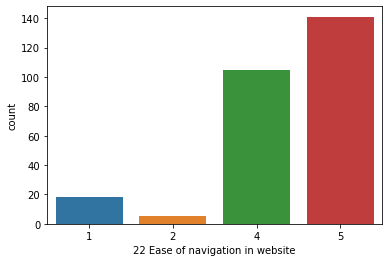

In [221]:
ax = sns.countplot(x="22 Ease of navigation in website", data=df_visualization)
print(df_visualization["22 Ease of navigation in website"])

0      1
1      5
2      4
3      4
4      5
      ..
264    4
265    5
266    4
267    4
268    5
Name: 23 Loading and processing speed, Length: 269, dtype: int64


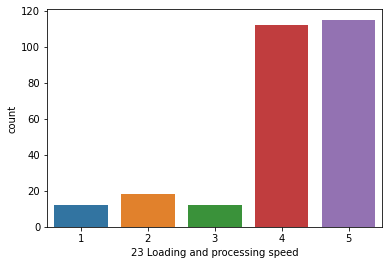

In [222]:
ax = sns.countplot(x="23 Loading and processing speed", data=df_visualization)
print(df_visualization["23 Loading and processing speed"])

0      2
1      5
2      5
3      5
4      5
      ..
264    4
265    5
266    4
267    5
268    5
Name: 24 User friendly Interface of the website, Length: 269, dtype: int64


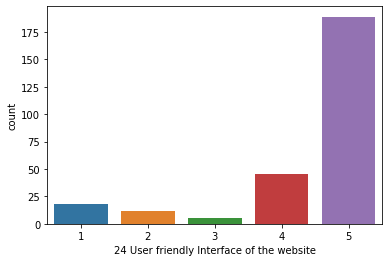

In [223]:
ax = sns.countplot(x="24 User friendly Interface of the website", data=df_visualization)
print(df_visualization["24 User friendly Interface of the website"])

0      2
1      5
2      5
3      5
4      5
      ..
264    4
265    5
266    5
267    5
268    5
Name: 25 Convenient Payment methods, Length: 269, dtype: int64


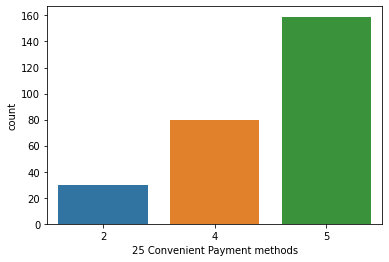

In [224]:
ax = sns.countplot(x="25 Convenient Payment methods", data=df_visualization)
print(df_visualization["25 Convenient Payment methods"])

0      2
1      5
2      5
3      4
4      4
      ..
264    4
265    5
266    4
267    5
268    5
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, Length: 269, dtype: int64


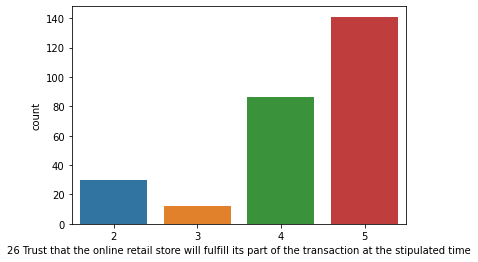

In [225]:
ax = sns.countplot(x="26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time", data=df_visualization)
print(df_visualization["26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"])

0      5
1      5
2      5
3      5
4      5
      ..
264    4
265    5
266    3
267    5
268    5
Name: 27 Empathy (readiness to assist with queries) towards the customers, Length: 269, dtype: int64


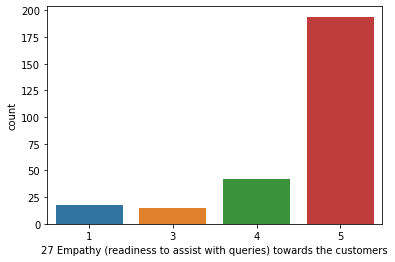

In [226]:
ax = sns.countplot(x="27 Empathy (readiness to assist with queries) towards the customers", data=df_visualization)
print(df_visualization["27 Empathy (readiness to assist with queries) towards the customers"])

0      4
1      5
2      5
3      5
4      4
      ..
264    4
265    5
266    3
267    5
268    5
Name: 28 Being able to guarantee the privacy of the customer, Length: 269, dtype: int64


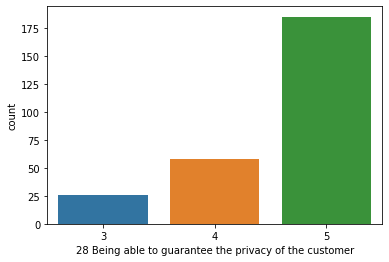

In [227]:
ax = sns.countplot(x="28 Being able to guarantee the privacy of the customer", data=df_visualization)
print(df_visualization["28 Being able to guarantee the privacy of the customer"])

0      4
1      5
2      5
3      4
4      5
      ..
264    4
265    5
266    4
267    5
268    5
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), Length: 269, dtype: int64


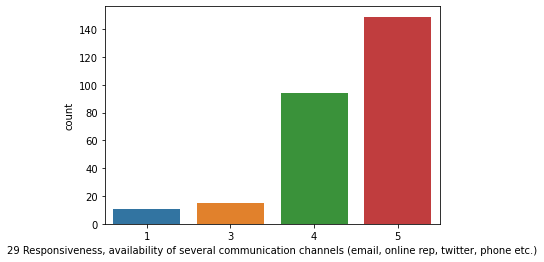

In [228]:
ax = sns.countplot(x="29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)", data=df_visualization)
print(df_visualization["29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"])

0      3
1      5
2      5
3      4
4      5
      ..
264    3
265    5
266    4
267    5
268    5
Name: 30 Online shopping gives monetary benefit and discounts, Length: 269, dtype: int64


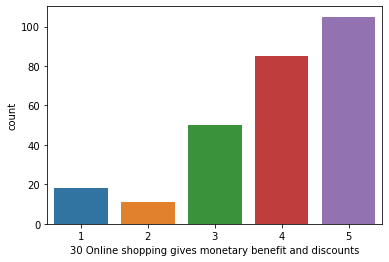

In [229]:
ax = sns.countplot(x="30 Online shopping gives monetary benefit and discounts", data=df_visualization)
print(df_visualization["30 Online shopping gives monetary benefit and discounts"])

0      1
1      5
2      5
3      3
4      5
      ..
264    3
265    5
266    3
267    4
268    5
Name: 31 Enjoyment is derived from shopping online, Length: 269, dtype: int64


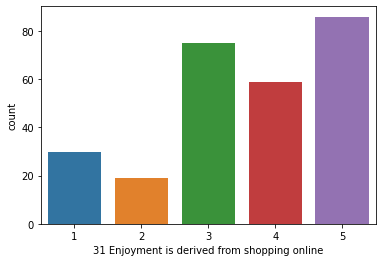

In [230]:
ax = sns.countplot(x="31 Enjoyment is derived from shopping online", data=df_visualization)
print(df_visualization["31 Enjoyment is derived from shopping online"])

0      2
1      5
2      5
3      3
4      5
      ..
264    3
265    5
266    4
267    5
268    5
Name: 32 Shopping online is convenient and flexible, Length: 269, dtype: int64


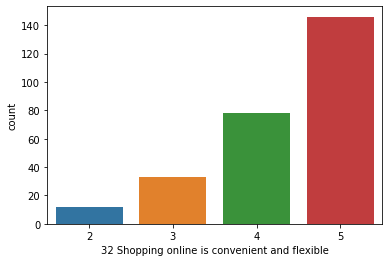

In [231]:
ax = sns.countplot(x="32 Shopping online is convenient and flexible", data=df_visualization)
print(df_visualization["32 Shopping online is convenient and flexible"])

0      2
1      5
2      5
3      4
4      5
      ..
264    2
265    5
266    5
267    4
268    5
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, Length: 269, dtype: int64


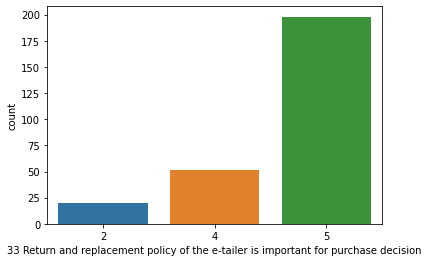

In [232]:
ax = sns.countplot(x="33 Return and replacement policy of the e-tailer is important for purchase decision", data=df_visualization)
print(df_visualization["33 Return and replacement policy of the e-tailer is important for purchase decision"])

0      4
1      5
2      5
3      3
4      2
      ..
264    3
265    5
266    3
267    4
268    5
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, Length: 269, dtype: int64


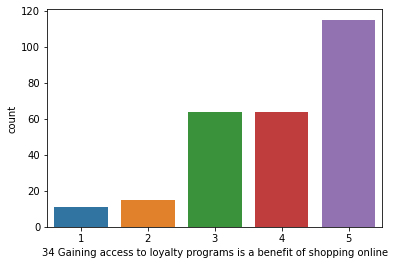

In [233]:
ax = sns.countplot(x="34 Gaining access to loyalty programs is a benefit of shopping online", data=df_visualization)
print(df_visualization["34 Gaining access to loyalty programs is a benefit of shopping online"])

0      3
1      5
2      5
3      3
4      4
      ..
264    3
265    5
266    4
267    5
268    4
Name: 35 Displaying quality Information on the website improves satisfaction of customers, Length: 269, dtype: int64


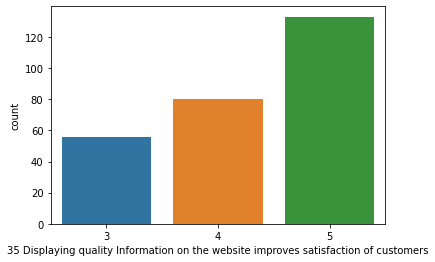

In [234]:
ax = sns.countplot(x="35 Displaying quality Information on the website improves satisfaction of customers", data=df_visualization)
print(df_visualization["35 Displaying quality Information on the website improves satisfaction of customers"])

0      5
1      5
2      5
3      4
4      5
      ..
264    2
265    5
266    4
267    5
268    5
Name: 36 User derive satisfaction while shopping on a good quality website or application, Length: 269, dtype: int64


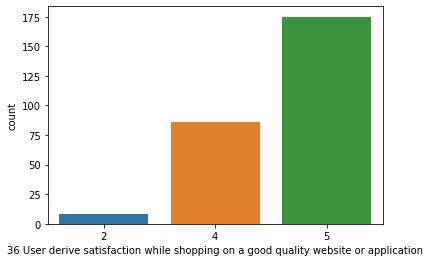

In [235]:
ax = sns.countplot(x="36 User derive satisfaction while shopping on a good quality website or application", data=df_visualization)
print(df_visualization["36 User derive satisfaction while shopping on a good quality website or application"])

0      4
1      5
2      5
3      3
4      5
      ..
264    3
265    5
266    4
267    5
268    5
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, Length: 269, dtype: int64


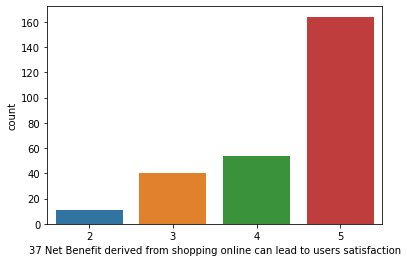

In [236]:
ax = sns.countplot(x="37 Net Benefit derived from shopping online can lead to users satisfaction", data=df_visualization)
print(df_visualization["37 Net Benefit derived from shopping online can lead to users satisfaction"])

0      5
1      5
2      4
3      4
4      5
      ..
264    4
265    5
266    4
267    5
268    5
Name: 38 User satisfaction cannot exist without trust, Length: 269, dtype: int64


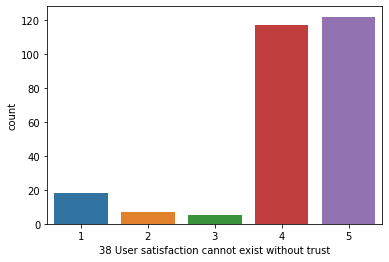

In [237]:
ax = sns.countplot(x="38 User satisfaction cannot exist without trust", data=df_visualization)
print(df_visualization["38 User satisfaction cannot exist without trust"])

0      3
1      5
2      5
3      4
4      4
      ..
264    4
265    5
266    3
267    5
268    5
Name: 39 Offering a wide variety of listed product in several category, Length: 269, dtype: int64


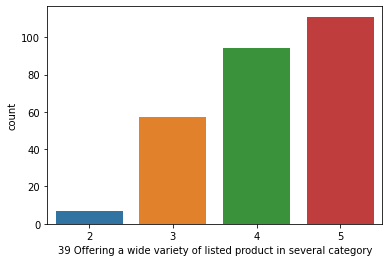

In [238]:
ax = sns.countplot(x="39 Offering a wide variety of listed product in several category", data=df_visualization)
print(df_visualization["39 Offering a wide variety of listed product in several category"])

0      3
1      5
2      5
3      4
4      4
      ..
264    3
265    5
266    5
267    4
268    5
Name: 40 Provision of complete and relevant product information, Length: 269, dtype: int64


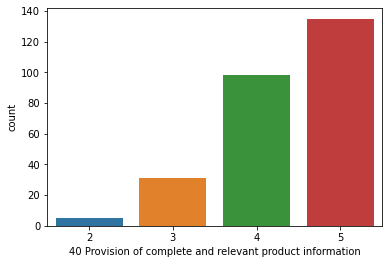

In [239]:
ax = sns.countplot(x="40 Provision of complete and relevant product information", data=df_visualization)
print(df_visualization["40 Provision of complete and relevant product information"])

0      110009
1      110030
2      201308
3      132001
4      530068
        ...  
264    173212
265    201008
266    560010
267    173229
268    201009
Name: 4 What is the Pin Code of where you shop online from?, Length: 269, dtype: int64


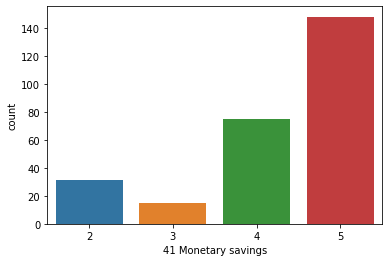

In [240]:
ax = sns.countplot(x="41 Monetary savings", data=df_visualization)
print(df_visualization["4 What is the Pin Code of where you shop online from?"])

0      3
1      3
2      4
3      4
4      4
      ..
264    3
265    5
266    4
267    4
268    5
Name: 42 The Convenience of patronizing the online retailer, Length: 269, dtype: int64


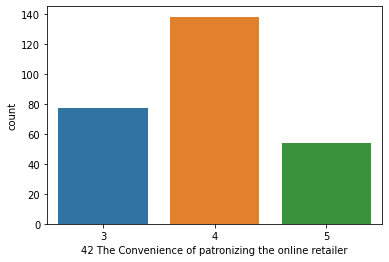

In [241]:
ax = sns.countplot(x="42 The Convenience of patronizing the online retailer", data=df_visualization)
print(df_visualization["42 The Convenience of patronizing the online retailer"])

0      4
1      3
2      4
3      4
4      3
      ..
264    2
265    5
266    2
267    4
268    5
Name: 43 Shopping on the website gives you the sense of adventure, Length: 269, dtype: int64


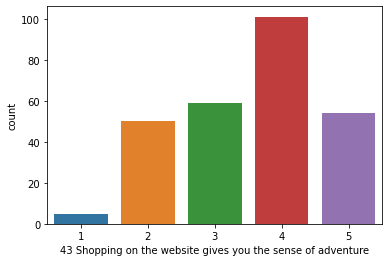

In [242]:
ax = sns.countplot(x="43 Shopping on the website gives you the sense of adventure", data=df_visualization)
print(df_visualization["43 Shopping on the website gives you the sense of adventure"])

0      4
1      3
2      4
3      5
4      1
      ..
264    4
265    5
266    3
267    3
268    5
Name: 44 Shopping on your preferred e-tailer enhances your social status, Length: 269, dtype: int64


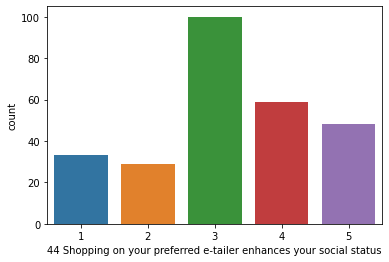

In [243]:
ax = sns.countplot(x="44 Shopping on your preferred e-tailer enhances your social status", data=df_visualization)
print(df_visualization["44 Shopping on your preferred e-tailer enhances your social status"])

0      5
1      5
2      3
3      4
4      5
      ..
264    3
265    5
266    4
267    3
268    5
Name: 45 You feel gratification shopping on your favorite e-tailer, Length: 269, dtype: int64


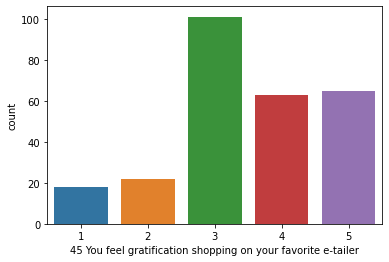

In [244]:
ax = sns.countplot(x="45 You feel gratification shopping on your favorite e-tailer", data=df_visualization)
print(df_visualization["45 You feel gratification shopping on your favorite e-tailer"])

0      4
1      5
2      3
3      3
4      1
      ..
264    4
265    5
266    4
267    4
268    5
Name: 46 Shopping on the website helps you fulfill certain roles, Length: 269, dtype: int64


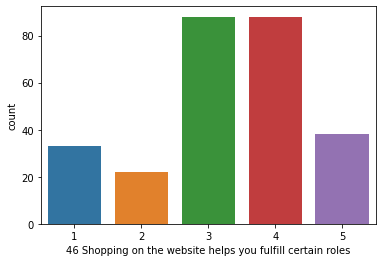

In [245]:
ax = sns.countplot(x="46 Shopping on the website helps you fulfill certain roles", data=df_visualization)
print(df_visualization["46 Shopping on the website helps you fulfill certain roles"])

0      5
1      5
2      4
3      4
4      5
      ..
264    3
265    5
266    4
267    3
268    5
Name: 47 Getting value for money spent, Length: 269, dtype: int64


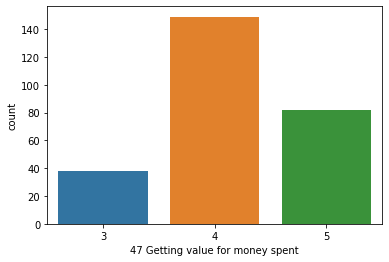

In [246]:
ax = sns.countplot(x="47 Getting value for money spent", data=df_visualization)
print(df_visualization["47 Getting value for money spent"])

# Encoding the Dataset:

In [247]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [248]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [249]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2.0,110009,5,4,4,3,5,1,...,0.0,0.0,3.0,5.0,0.0,3.0,2.0,0.0,0.0,6.0
1,1,2,2.0,110030,5,5,2,1,2,3,...,1.0,6.0,7.0,10.0,7.0,5.0,0.0,4.0,1.0,3.0
2,1,2,4.0,201308,4,5,3,1,4,2,...,7.0,6.0,4.0,7.0,0.0,3.0,5.0,6.0,0.0,5.0
3,0,2,6.0,132001,4,1,3,1,4,3,...,9.0,7.0,4.0,8.0,5.0,3.0,1.0,1.0,2.0,1.0
4,1,2,0.0,530068,3,2,2,1,2,3,...,5.0,8.0,5.0,8.0,7.0,3.0,0.0,7.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,10.0,173212,2,1,3,1,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,1,3,3.0,201008,2,4,3,1,5,2,...,4.0,4.0,3.0,5.0,3.0,1.0,2.0,2.0,4.0,6.0
266,1,4,0.0,560010,3,1,3,2,5,1,...,0.0,9.0,0.0,10.0,7.0,5.0,6.0,7.0,0.0,0.0
267,1,1,10.0,173229,3,1,2,1,4,2,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,5.0,5.0,0.0


# Describing the dataset:

In [250]:
df.describe()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,4.494424,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,...,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.471398,1.066012,3.187687,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,...,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,1.000000,0.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,3.000000,4.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,...,3.000000,4.000000,4.000000,7.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,1.000000,4.000000,7.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,...,7.000000,7.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,4.000000,5.000000
max,1.000000,5.000000,10.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,...,9.000000,9.000000,7.000000,10.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000


<AxesSubplot:>

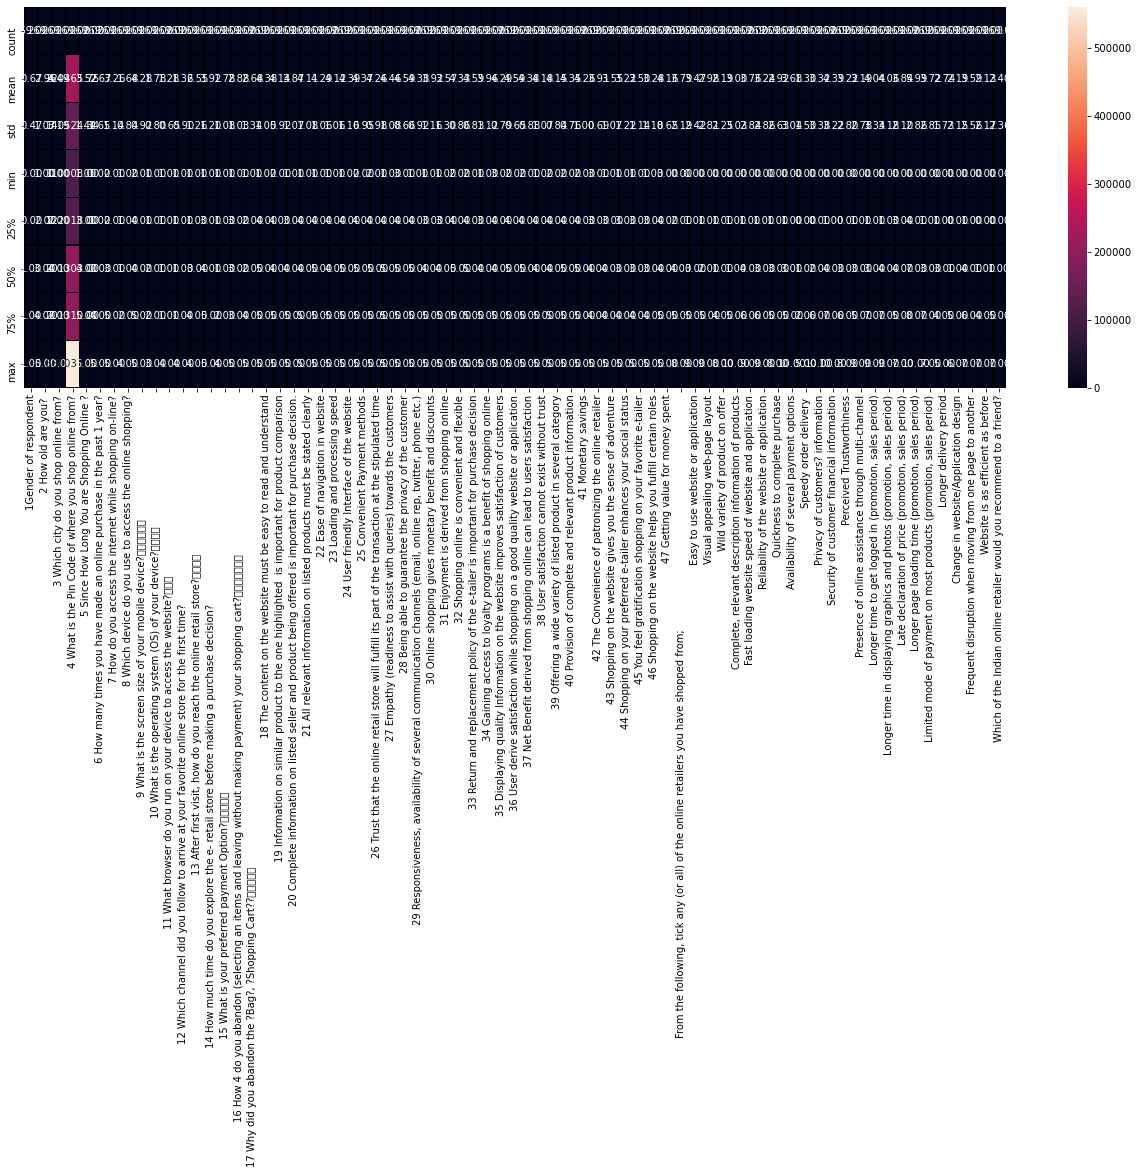

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Checking distribution of the target variable:

In [252]:
df_visualization=df[["Which of the Indian online retailer would you recommend to a friend?"]].copy()

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='Density'>

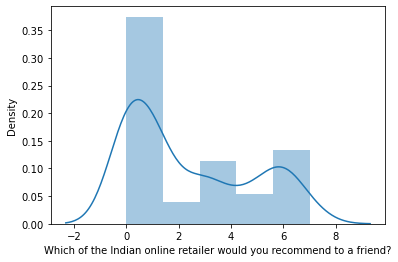

In [253]:
import seaborn as sns
sns.distplot(df_visualization["Which of the Indian online retailer would you recommend to a friend?"], kde=True)

# Correlation of the columns with the Target column:

In [254]:
df.corr()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
1Gender of respondent,1.000000,-0.034449,-0.091867,0.260696,-0.046005,0.076121,-0.200974,-0.241847,-0.058760,-0.038207,...,0.097002,0.230735,0.068137,0.002793,0.163248,-0.052701,0.154007,0.260813,-0.047723,-0.002005
2 How old are you?,-0.034449,1.000000,-0.077481,-0.057393,0.014049,0.005089,0.024228,0.292176,0.227841,-0.133597,...,-0.088480,-0.116001,0.118635,-0.137449,-0.040609,0.077265,0.076580,-0.063690,-0.076628,-0.002406
3 Which city do you shop online from?,-0.091867,-0.077481,1.000000,-0.416597,0.103714,-0.127906,-0.069673,-0.001366,0.181806,-0.120789,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
4 What is the Pin Code of where you shop online from?,0.260696,-0.057393,-0.416597,1.000000,0.092980,-0.021229,0.134879,-0.103424,-0.189814,0.077905,...,-0.085194,0.089605,-0.070046,-0.026817,0.054532,-0.078660,-0.058715,0.039936,0.037662,-0.045388
5 Since How Long You are Shopping Online ?,-0.046005,0.014049,0.103714,0.092980,1.000000,0.291104,0.080738,0.309634,0.118596,-0.141768,...,-0.063932,0.000073,0.048183,0.018714,-0.038376,0.146307,0.102906,-0.043482,-0.176908,0.029584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Longer delivery period,-0.052701,0.077265,-0.123369,-0.078660,0.146307,-0.006841,0.048490,0.279346,0.028235,-0.056460,...,0.268484,0.365030,0.598200,0.797480,0.593167,1.000000,0.329965,0.475654,0.247471,0.428419
Change in website/Application design,0.154007,0.076580,0.000427,-0.058715,0.102906,0.041653,-0.075205,0.159209,0.408534,-0.325123,...,0.370649,0.152655,0.035417,0.225618,0.214103,0.329965,1.000000,0.436573,-0.189925,0.423877
Frequent disruption when moving from one page to another,0.260813,-0.063690,0.019167,0.039936,-0.043482,-0.009108,-0.131151,-0.062060,-0.086322,-0.072695,...,0.274454,0.603750,0.332032,0.614528,0.506431,0.475654,0.436573,1.000000,0.363440,0.122953
Website is as efficient as before,-0.047723,-0.076628,0.007117,0.037662,-0.176908,-0.162551,-0.091342,0.105177,-0.087796,0.211161,...,0.122555,-0.010967,0.123087,0.319264,0.275338,0.247471,-0.189925,0.363440,1.000000,0.252154


Checking the columns which are positively and negatively correlated with the target column

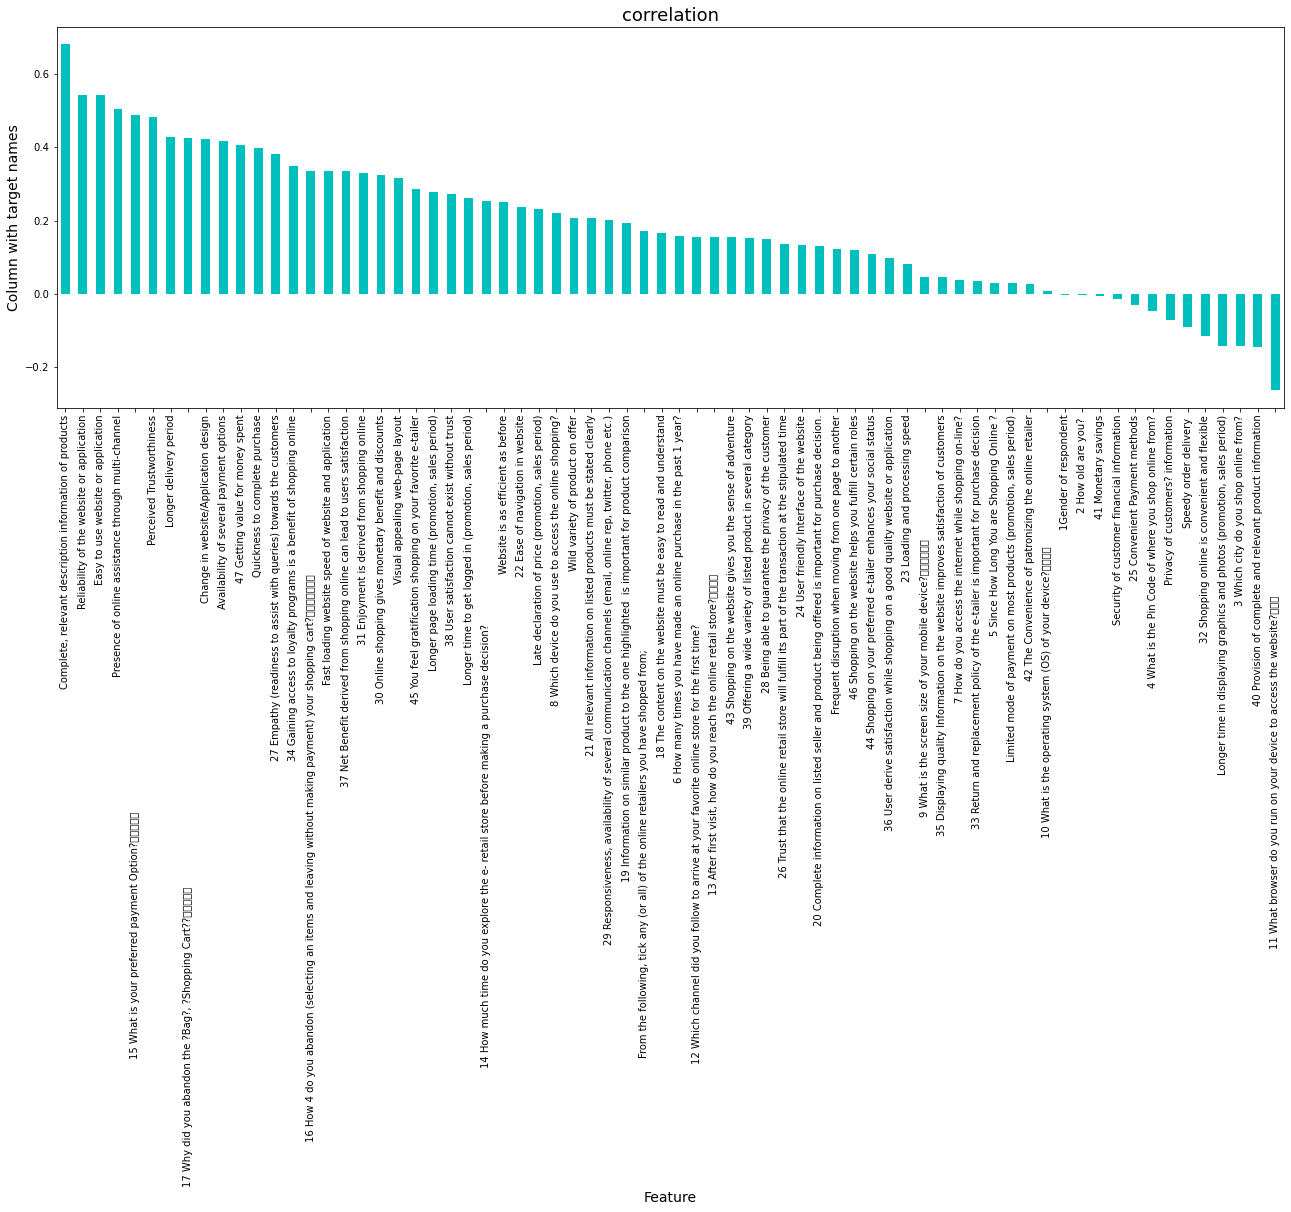

In [255]:
plt.figure(figsize=(22,7))
df.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values(ascending=False).drop(['Which of the Indian online retailer would you recommend to a friend?']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Checking the skewness and Outliers:

In [256]:
df.skew()

1Gender of respondent                                                  -0.723007
2 How old are you?                                                      0.063243
3 Which city do you shop online from?                                   0.313729
4 What is the Pin Code of where you shop online from?                   1.748322
5 Since How Long You are Shopping Online ?                             -0.554705
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 71, dtype: float64

We can see that the data has skewness. So we will be removing skewness.

In [257]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

df_new = pd.DataFrame(df_new,columns=df.columns)

In [258]:
df_new.skew()

1Gender of respondent                                                  -0.723007
2 How old are you?                                                     -0.055327
3 Which city do you shop online from?                                  -0.132990
4 What is the Pin Code of where you shop online from?                   0.000000
5 Since How Long You are Shopping Online ?                             -0.307632
                                                                          ...   
Longer delivery period                                                 -0.226723
Change in website/Application design                                   -0.002355
Frequent disruption when moving from one page to another               -0.271126
Website is as efficient as before                                       0.018153
Which of the Indian online retailer would you recommend to a friend?    0.006779
Length: 71, dtype: float64

In [259]:
x=df_new

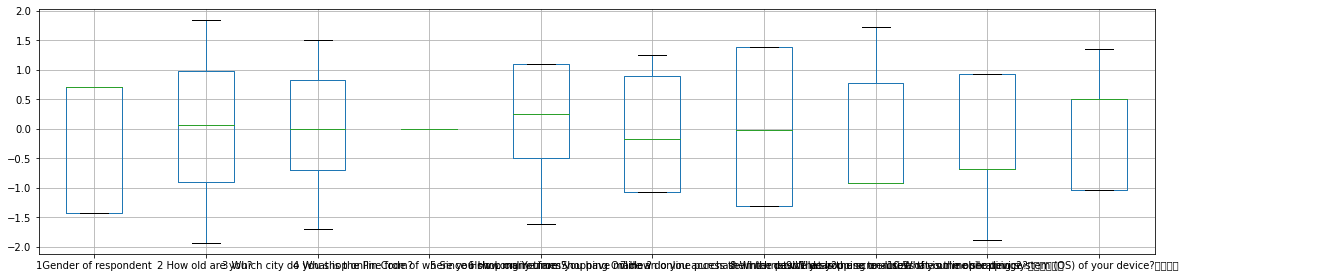

In [260]:
x.iloc[:,0:10].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

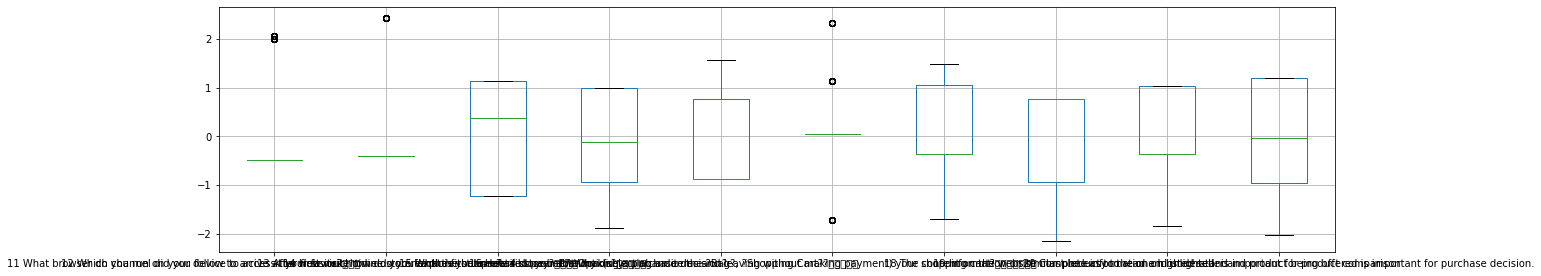

In [261]:
x.iloc[:,10:20].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

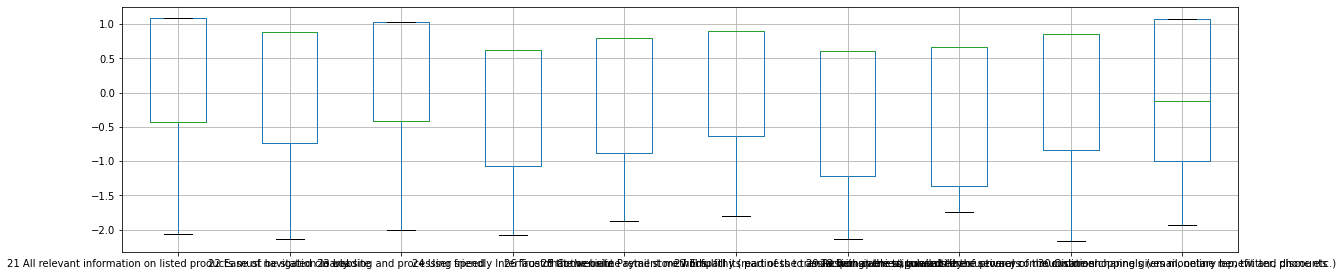

In [262]:
x.iloc[:,20:30].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

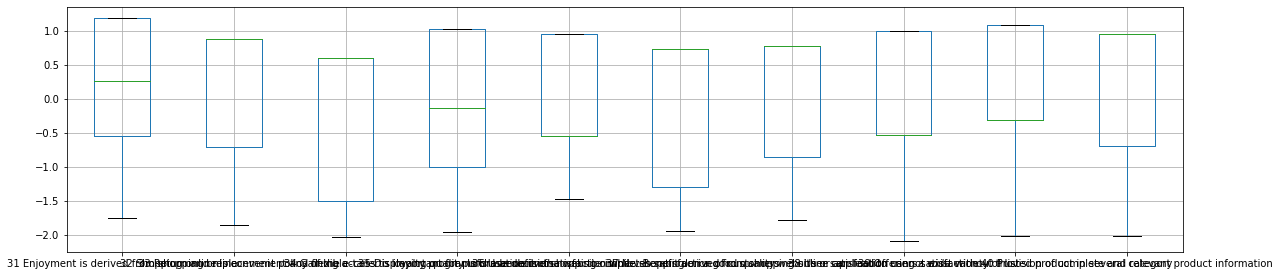

In [263]:
x.iloc[:,30:40].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

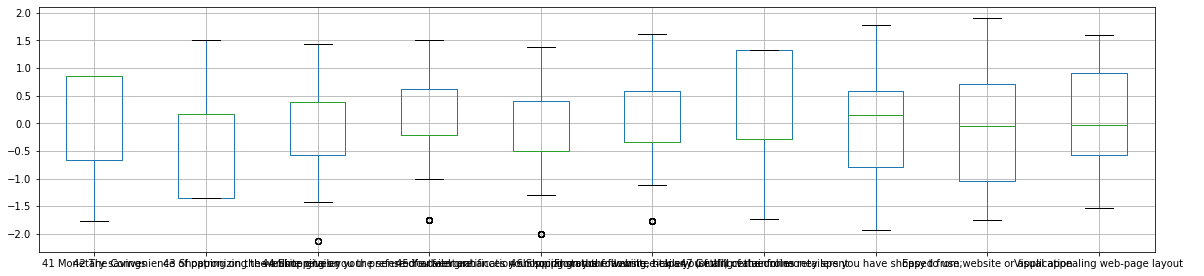

In [264]:
x.iloc[:,40:50].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

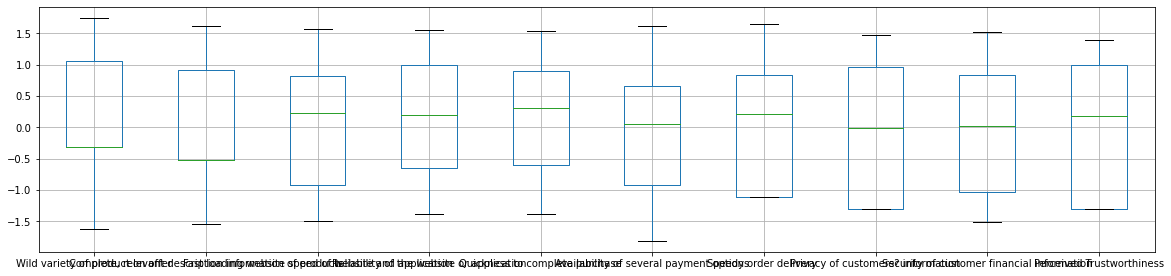

In [265]:
x.iloc[:,50:60].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

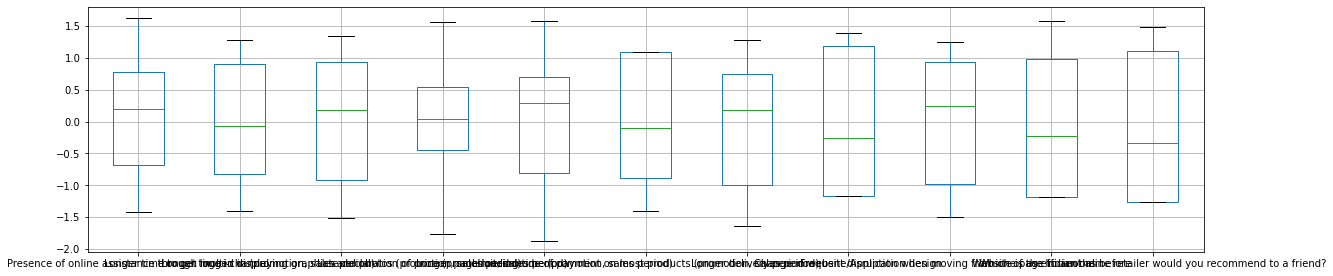

In [266]:
x.iloc[:,60:71].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

There are no major outliers present in the dataset.

# Separating the columns into x(independent variables) and y(Target variable):

In [267]:
x= df.drop("Which of the Indian online retailer would you recommend to a friend?",axis=1)
y= df["Which of the Indian online retailer would you recommend to a friend?"]

# Finding best random_state:

In [268]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.24691358024691357 on Random_state 1
Best accuracy is 0.2716049382716049 on Random_state 2
Best accuracy is 0.8765432098765432 on Random_state 3
Best accuracy is 0.9135802469135802 on Random_state 8
Best accuracy is 0.9259259259259259 on Random_state 29
Best accuracy is 0.9382716049382716 on Random_state 97


We have found best random_state value as 97. We will create our train_test_split using the random_state(97)

# Creating train-test-split:

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=97)

In [270]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9382716049382716
[[24  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  2  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  2  0 10  0]
 [ 0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        24
         1.0       1.00      0.90      0.95        20
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         7
         4.0       0.33      0.50      0.40         2
         5.0       1.00      1.00      1.00         8
         6.0       0.83      0.83      0.83        12
         7.0       1.00      1.00      1.00         4

    accuracy                           0.94        81
   macro avg       0.89      0.90      0.90        81
weighted avg       0.95      0.94      0.94        81



In [271]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[24  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00        12
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [272]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[24  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00        12
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [273]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.2716049382716049
[[13 11  0  0  0  0  0  0]
 [11  9  0  0  0  0  0  0]
 [ 3  1  0  0  0  0  0  0]
 [ 5  2  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0]
 [ 7  5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.27      0.54      0.36        24
         1.0       0.28      0.45      0.35        20
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         4

    accuracy                           0.27        81
   macro avg       0.07      0.12      0.09        81
weighted avg       0.15      0.27      0.19        81



We are getting highest accuracy with DecisionTreeClassifier and RandomForestClassifier, but it can be due to overfitting also so we will check cross validation scores

In [274]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of LogisticRegression model : ",scr.mean())

Cross validation score of LogisticRegression model :  0.38252969951083154


In [275]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of DecisionTressClassifier model : ",scr.mean())

Cross validation score of DecisionTressClassifier model :  1.0


In [276]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForestClassifier model : ",scr.mean())

Cross validation score of RandomForestClassifier model :  1.0


In [277]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model : ",scr.mean())

Cross validation score of SVC model :  0.30859538784067087


The accuracy and cross validation score for RandomForestClassifier is same, so this is our best model.

# Hyper parameter tunning:

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
parameters={'max_depth': np.arange(2, 15),
           'criterion':['gini','entropy']}

In [280]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [281]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [283]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [284]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [285]:
accuracy_score(y_test,GCV_pred)

1.0

In [286]:
import joblib
joblib.dump(GCV_pred,"CustomerRetentionModel.obj")

['CustomerRetentionModel.obj']